<a href="https://colab.research.google.com/github/2Svenkatesh/Data-science/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import numpy as np
from collections import Counter
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold, cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/IRIS.csv')

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


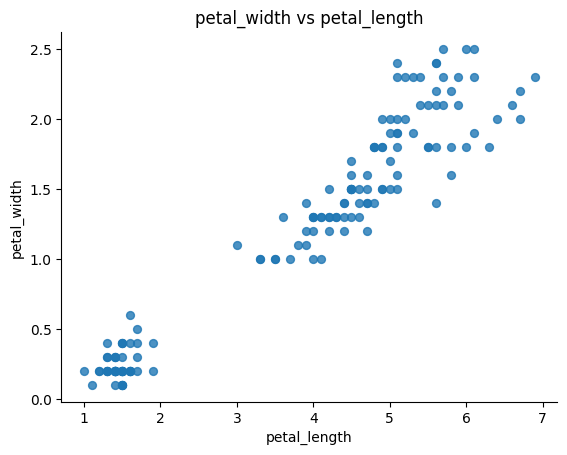

In [ ]:
data.plot(kind='scatter', x='petal_length', y='petal_width', s=32, alpha=.8)
plt.title('petal_width vs petal_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

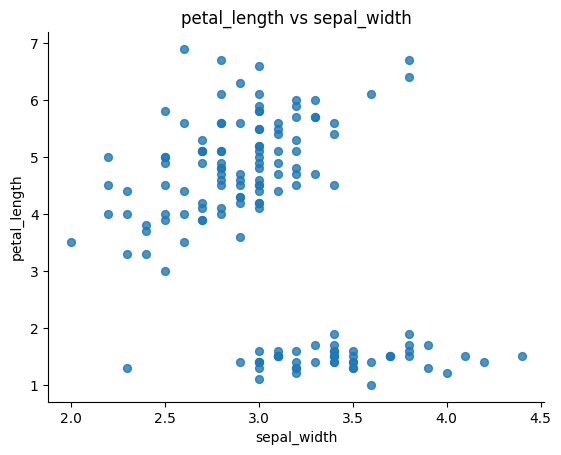

In [ ]:
data.plot(kind='scatter', x='sepal_width', y='petal_length', s=32, alpha=.8)
plt.title('petal_length vs sepal_width')
plt.gca().spines[['top', 'right',]].set_visible(False)

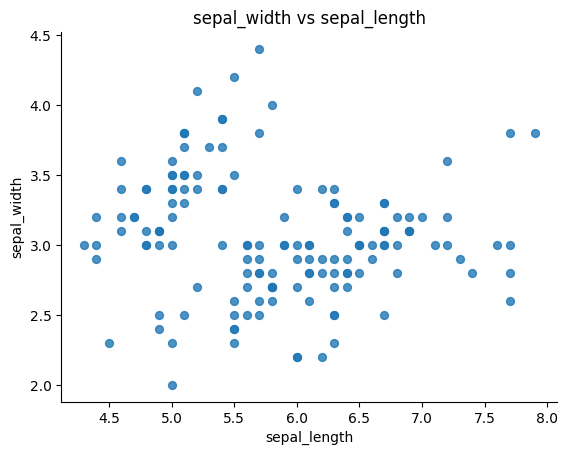

In [ ]:
data.plot(kind='scatter', x='sepal_length', y='sepal_width', s=32, alpha=.8)
plt.title('sepal_width vs sepal_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
encoder = LabelEncoder()
data['species'] = encoder.fit_transform(data['species'])

In [ ]:
data.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
136,6.3,3.4,5.6,2.4,2
134,6.1,2.6,5.6,1.4,2
118,7.7,2.6,6.9,2.3,2
97,6.2,2.9,4.3,1.3,1
84,5.4,3.0,4.5,1.5,1


In [ ]:
data['species'].value_counts()

,count
species,
0,50
1,50
2,50


In [ ]:
X = data.drop('species', axis=1)
y = data['species']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
class KNN:
  def __init__(self, k, metric='euclidean'):
    self.k = k
    self.metric = metric

  def fit(self, X_train, y_train):
    self.X_train = np.array(X_train)
    self.y_train = np.array(y_train)


  def _euclidean_distance(self, A, B):
    return np.sqrt(np.sum((np.array(A) - np.array(B)) ** 2))

  def _manhattan_distance(self, A, B):
    return np.abs(np.sum(np.array(A) - np.array(B)))

  def _cosine_similarity(self, A, B):
    dot_product = np.dot(A, B)
    norm_A = np.linalg.norm(A)
    norm_B = np.linalg.norm(B)
    return 1 - dot_product / (norm_A * norm_B) if norm_A * norm_B != 0 else 0


  def _predict_point(self, test_point):
    distances = []
    if (self.metric == "euclidean"):
      distances = [(self._euclidean_distance(self.X_train[i], test_point), self.y_train[i]) for i in range(len(self.X_train))]

    elif (self.metric == "manhattan"):
      distances = [(self._manhattan_distance(self.X_train[i], test_point), self.y_train[i]) for i in range(len(self.X_train))]

    elif (self.metric == "cosine"):
      distances = [(self._cosine_similarity(self.X_train[i], test_point), self.y_train[i]) for i in range(len(self.X_train))]

    distances.sort(key=lambda x: x[0])

    k_nearest_labels = [label for _, label in distances[:self.k]]  # get labels of the nearest k points

    most_common = Counter(k_nearest_labels).most_common(1)  # get the number of most common label
    return most_common[0][0]


  def predict(self, X_test):
    X_test = np.array(X_test)
    predictions = [self._predict_point(x) for x in X_test]
    return predictions

  def score(self, X, y):
      y_pred = self.predict(X)
      return np.mean(y_pred == np.array(y))  # accuracy calculation

In [20]:
knn_euclidean = KNN(k = 3, metric = 'euclidean')
knn_euclidean.fit(X_train, y_train)

In [21]:
y_pred_euclidean = knn_euclidean.predict(X_test)
print(y_pred_euclidean)

[np.int64(1), np.int64(0), np.int64(2), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(2), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(2), np.int64(0), np.int64(2), np.int64(0), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(0), np.int64(0)]


In [22]:
print('classification report for implemented KNN (Euclidean Distance):\n')
print(classification_report(y_pred_euclidean, y_test))

classification report for implemented KNN (Euclidean Distance):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



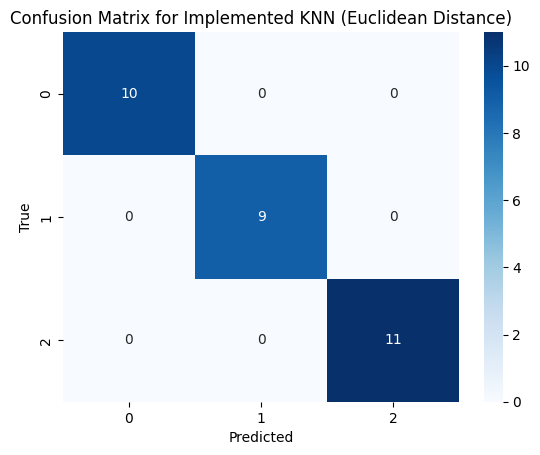

In [23]:
cm = confusion_matrix(y_test, y_pred_euclidean)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Implemented KNN (Euclidean Distance)')
plt.show()


In [24]:
knn_manhattan = KNN(k = 3, metric='manhattan')
knn_manhattan.fit(X_train, y_train)

In [25]:
y_pred_manhattan = knn_manhattan.predict(X_test)
print(y_pred_manhattan)

[np.int64(1), np.int64(1), np.int64(2), np.int64(1), np.int64(2), np.int64(0), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(2), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(2), np.int64(2), np.int64(1), np.int64(1), np.int64(2), np.int64(0), np.int64(2), np.int64(0), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(0), np.int64(0)]


In [26]:
print('classification report for implemented KNN (Manhattan Distance):\n')
print(classification_report(y_pred_manhattan, y_test))

classification report for implemented KNN (Manhattan Distance):

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.78      0.88      0.82         8
           2       1.00      0.85      0.92        13

    accuracy                           0.90        30
   macro avg       0.89      0.91      0.90        30
weighted avg       0.91      0.90      0.90        30



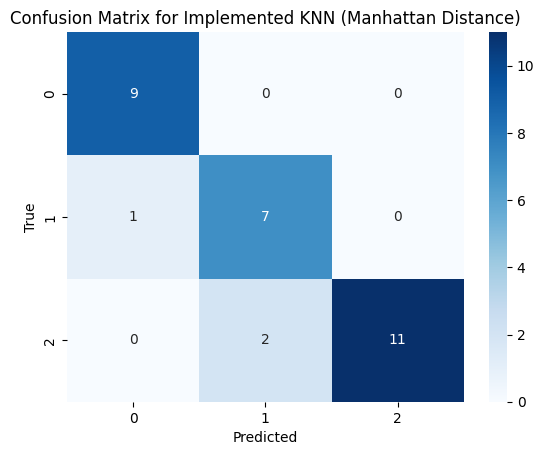

In [27]:
cm_manhattan = confusion_matrix(y_pred_manhattan, y_test)
sns.heatmap(cm_manhattan, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Implemented KNN (Manhattan Distance)')
plt.show()

In [28]:
knn_cosine = KNN(k = 3, metric='cosine')
knn_cosine.fit(X_train, y_train)

In [29]:
y_pred_cosine = knn_cosine.predict(X_test)
print(y_pred_cosine)

[np.int64(1), np.int64(0), np.int64(2), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(2), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(2), np.int64(0), np.int64(2), np.int64(0), np.int64(2), np.int64(1), np.int64(2), np.int64(2), np.int64(2), np.int64(0), np.int64(0)]


In [30]:
print('classification report for implemented KNN (Cosine Similarity):\n')
print(classification_report(y_pred_cosine, y_test))

classification report for implemented KNN (Cosine Similarity):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



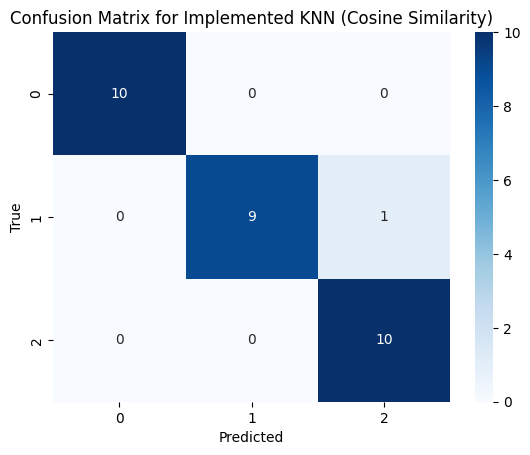

In [31]:
cm_cosine = confusion_matrix(y_pred_cosine, y_test)

sns.heatmap(cm_cosine, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Implemented KNN (Cosine Similarity)')
plt.show()

In [33]:
knn_builtin = KNeighborsClassifier(n_neighbors=3)
knn_builtin.fit(X_train, y_train)
y_pred_builtin = knn_builtin.predict(X_test)

In [34]:
print('classification report for built-in KNN:\n')
print(classification_report(y_pred_builtin, y_test))

classification report for built-in KNN:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



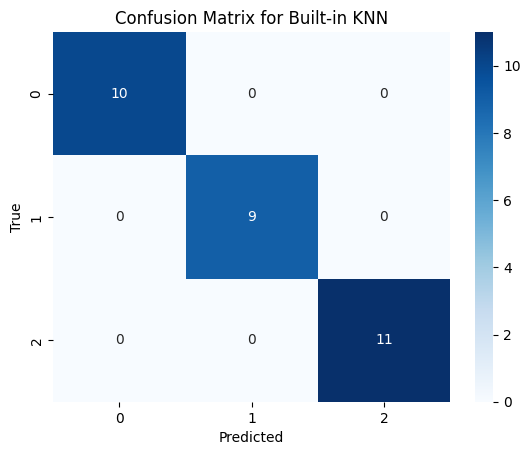

In [35]:
cm_builtin = confusion_matrix(y_pred_builtin, y_test)

sns.heatmap(cm_builtin, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Built-in KNN')
plt.show()